In [53]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import h5py

import numpy as np
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import astropy.constants as c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
import dm21cm.physics as phys

sys.path.append(WDIR + '/preprocessing/pbh')
from read import read_pbh, output_specs

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

## $\dot M$

In [3]:
results_dir = '/n/home07/yitians/dm21cm/blackhawk/BlackHawk_v2.2/results'
run_name = 'm13.200_sec'

run_dir = f"{results_dir}/{run_name}"

In [4]:
evol_data = read_pbh(run_dir, 'evolution')

In [73]:
evol_data['units']

{'M0': Unit("g"),
 'rho_comov': Unit("1 / cm3"),
 't': Unit("s"),
 'dt': Unit("s"),
 'M': Unit("g")}

In [22]:
eV_per_g = (u.g*c.c**2).to('eV').value
print(eV_per_g)

5.609588603804452e+32


In [29]:
np.where(evol_data['t'] > 1e11)[0][0]

119

In [69]:
phot_pri_data = read_pbh(run_dir, 'primary', 'photon')
elec_pri_data = read_pbh(run_dir, 'primary', 'electron')
phot_sec_data = read_pbh(run_dir, 'secondary', 'photon')
elec_sec_data = read_pbh(run_dir, 'secondary', 'electron')
print(phot_sec_data['units'])

{'E': Unit("eV"), 't': Unit("s"), 'dN_dEdt': Unit("1 / (eV s)")}


In [47]:
print(phot_sec_data['dN_dEdt'].shape)
print(phot_sec_data['t'].shape)
print(phot_sec_data['E'].shape)

(689, 500)
(689,)
(500,)


In [ ]:
elec_sec_data['E']

In [70]:
t = phot_sec_data['t']
phot_E = phot_pri_data['E']
dEdt_phot = np.trapz(phot_pri_data['dN_dEdt'] * phot_E, phot_E)
elec_E = elec_pri_data['E'] + phys.m_e
dEdt_elec = np.trapz(elec_pri_data['dN_dEdt'] * elec_E, elec_E)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/func

(100.0, 200.0)

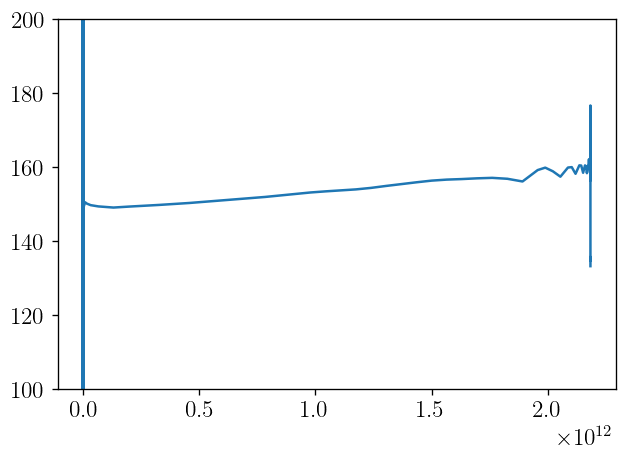

In [85]:
plt.plot(t, -np.gradient(evol_data['M'], evol_data['t'])*eV_per_g / P_s)
plt.ylim(100, 200)

array([1.62428447, 1.62428447, 1.62428447, 1.62428447, 1.62428447,
       1.62428447, 1.62428447, 1.62428447, 1.62428447, 1.62428447,
       1.62428447, 1.62428447, 1.62428447, 1.62428447, 1.62428447,
       1.62428447, 1.62428447, 1.62428447, 1.62428447, 1.62428447])

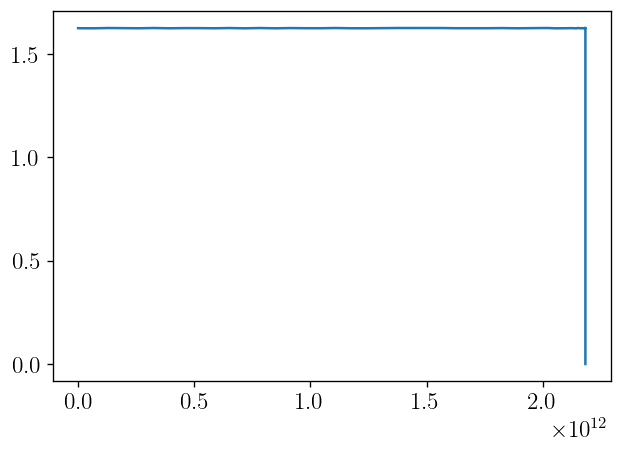

In [77]:
plt.plot(t, dEdt_phot / P_s)
(dEdt_phot / P_s)[:20]

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/numpy/lib/func

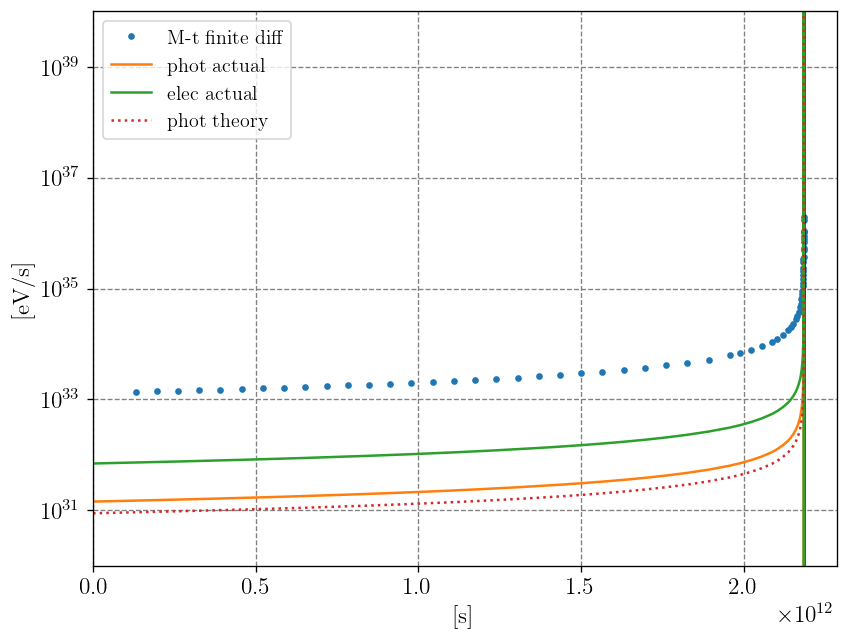

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

i = np.where(evol_data['t'] > 1e11)[0][0]
ax.plot(evol_data['t'][i:], -np.gradient(evol_data['M'][i:], evol_data['t'][i:])*eV_per_g, '.', label='M-t finite diff')
ax.set(yscale='log', xlim=(0, None), ylim=(1e30, 1e40))
ax.set(ylabel='[eV/s]', xlabel='[s]')

t_f = evol_data['t'][-1]
ax.axvline(t_f, color='b')
ax.yaxis.grid(color='gray', ls='--')
ax.xaxis.grid(color='gray', ls='--')


ax.plot(t, dEdt_phot, label='phot actual')
ax.plot(t, dEdt_elec, label='elec actual')

P_s = ((c.hbar*c.c**6) / (15360*np.pi*c.G**2*u.g**2*evol_data['M']**2)).to('eV/s').value
ax.plot(evol_data['t'], P_s, ':', label='phot theory')
ax.legend()